# Cleaning University of California Berkeley Power Consumption Dataset

The data retrieved from [UCB's energy dashboard](https://engagementdashboard.com/ucb/ucb) regarding power consumption in UCB's Mechanical Engineering building is in the form of a `json` format. Here we'll be converting it into a `csv` file for later data analysis. 


In [1]:
import numpy as np
import pandas as pd
import json
import pprint
from datetime import datetime

In [42]:
#Format into dates
def format_time(unix_timestamp):
    format = '%Y-%m-%d'
    ts = int(unix_timestamp)
    return datetime.utcfromtimestamp(ts).strftime(format)

#Create list of datetime objects from timestamps
def gen_datetimes(li):
    datetimes = []
    for time in li:
        datetimes.append(datetime.utcfromtimestamp(time))
    return datetimes

In [3]:
with open('Datasets/UCB_PowerConsumption.json') as json_file:
    data = json.load(json_file)[0]
    
pprint.pprint(data)

{'actual': {'data': [{'completeness': 2.0,
                      'timestamp': 1571554800,
                      'value': 343.2664},
                     {'completeness': 2.0,
                      'timestamp': 1571641200,
                      'value': 379.87442},
                     {'completeness': 1.9991550925925927,
                      'timestamp': 1571727600,
                      'value': 381.02838},
                     {'completeness': 2.0,
                      'timestamp': 1571814000,
                      'value': 387.9686},
                     {'completeness': 1.9999421296296296,
                      'timestamp': 1571900400,
                      'value': 385.93735},
                     {'completeness': 1.999976851851852,
                      'timestamp': 1571986800,
                      'value': 376.15204},
                     {'completeness': 1.9895833333333335,
                      'timestamp': 1572073200,
                      'value': 315.28287},
            

                     {'completeness': 2.0,
                      'timestamp': 1601794800,
                      'value': 317.00928},
                     {'completeness': 2.0,
                      'timestamp': 1601881200,
                      'value': 334.36243},
                     {'completeness': 2.0,
                      'timestamp': 1601967600,
                      'value': 332.42722},
                     {'completeness': 2.0,
                      'timestamp': 1602054000,
                      'value': 335.14673},
                     {'completeness': 2.0,
                      'timestamp': 1602140400,
                      'value': 330.28357},
                     {'completeness': 2.0,
                      'timestamp': 1602226800,
                      'value': 327.93445},
                     {'completeness': 1.999988425925926,
                      'timestamp': 1602313200,
                      'value': 318.18527},
                     {'completeness': 2.0,
            

                        'timestamp': 1587711600,
                        'value': 362.75497},
                       {'completeness': 1.0,
                        'timestamp': 1587798000,
                        'value': 328.4438},
                       {'completeness': 1.0,
                        'timestamp': 1587884400,
                        'value': 322.62744},
                       {'completeness': 1.0,
                        'timestamp': 1587970800,
                        'value': 361.14185},
                       {'completeness': 1.0,
                        'timestamp': 1588057200,
                        'value': 369.5937},
                       {'completeness': 1.0,
                        'timestamp': 1588143600,
                        'value': 369.23962},
                       {'completeness': 1.0,
                        'timestamp': 1588230000,
                        'value': 367.50253},
                       {'completeness': 1.0,
                        'time

In [49]:
#Split dataset
actual = data['actual']
expected = data['baseline']

#Create new dataframe
df_power = pd.DataFrame(columns = ['act_power', 'exp_power', 'date','timestamp'])
df_power.head()

,act_power,exp_power,date,timestamp


In [50]:
actual_li = actual['data']
expected_li = expected['data']
loc = 0

for i in range(len(actual_li)):
    #Get corresponding dicts
    dt1 = actual_li[i]
    dt2 = expected_li[i]
    
    #Ensure they're of the same time
    assert(dt1['timestamp'] == dt2['timestamp'])
    
    #Get data in appropriate format
    time = format_time(dt1['timestamp'])
    act_power = dt1['value']
    exp_power = dt2['value']
    ts = dt1['timestamp']
    
    #Add to dataframe
    df_power.loc[loc] = [act_power, exp_power, time, ts]
    
    #Increment location tracker
    loc += 1
    
#Print out final data
df_power.head()

,act_power,exp_power,date,timestamp
0,343.26640,323.80408,2019-10-20,1571554800
1,379.87442,361.45285,2019-10-21,1571641200
2,381.02838,369.67203,2019-10-22,1571727600
3,387.96860,370.47214,2019-10-23,1571814000
4,385.93735,368.36032,2019-10-24,1571900400


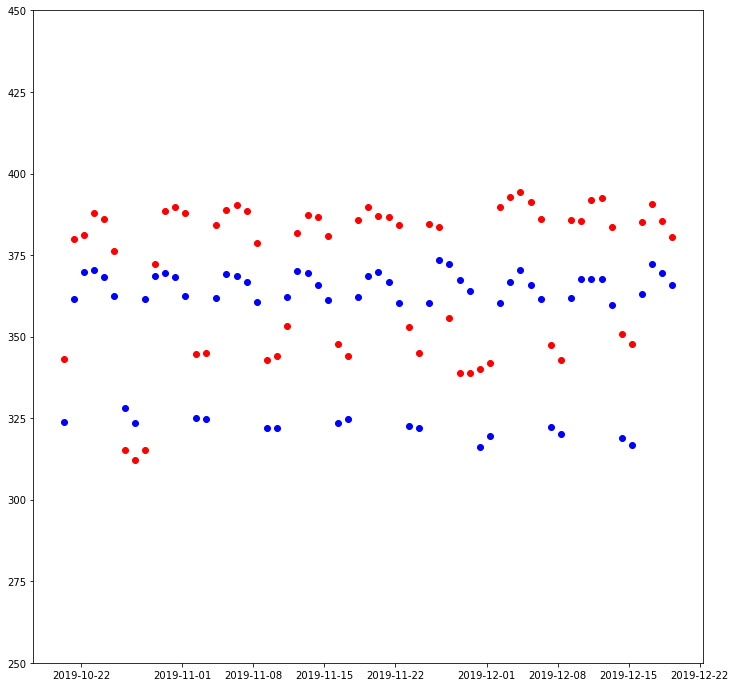

In [57]:
#Plotting data for exploratory analysis 
from matplotlib.dates import date2num
import matplotlib.pyplot as plt

#Select subset of data by altering variables. Choose entire scale by 1, 0
num_split = 6
num_piece = 0
df = np.split(df_power, num_split)[num_piece]

plt.figure(figsize=(12,12))
#Change y-range
plt.ylim(250, 450) 
#Convert timestamps into correct date format for matplotlib
dates = date2num(gen_datetimes(df['timestamp']))
#Plot points
plt.plot_date(dates, df['act_power'], color='Red')
plt.plot_date(dates, df['exp_power'], color='Blue')
plt.show()

In [53]:
#Place dataset in .csv file
df_power.to_csv('Datasets/UCB_PowerConsumption.csv', index=False)